In [1]:
!git clone https://github.com/Marsmallotr/License-Plate-Recognition.git
%cd License-Plate-Recognition
# install dependencies using pip
!pip install -r ./requirement.txt

Cloning into 'License-Plate-Recognition'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 155 (delta 9), reused 15 (delta 5), pack-reused 131
Receiving objects: 100% (155/155), 313.02 MiB | 14.40 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/License-Plate-Recognition
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using ca

In [2]:
!pip install gdown

In [3]:
!gdown --id 1g1u7M4NmWDsMGOppHocgBKjbwtDA-uIu

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1g1u7M4NmWDsMGOppHocgBKjbwtDA-uIu
To: /content/License-Plate-Recognition/yolov5.zip
100% 14.0M/14.0M [00:00<00:00, 37.5MB/s]


In [4]:
ls

function/    LP_recognition.ipynb  __pycache__/  requirement.txt  test_image/  webcam.py
lp_image.py  model/                README.md     result/          training/    yolov5.zip


In [5]:
import zipfile

zip_file = zipfile.ZipFile("yolov5.zip")
zip_file.extractall()
zip_file.close()

In [6]:

from PIL import Image
import cv2
import torch
import math
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper

In [20]:
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

INFO:yolov5:YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.3.0+cu121 CPU

YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.3.0+cu121 CPU

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 290 layers, 20852934 parameters, 0 gradients
Model summary: 290 layers, 20852934 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 
INFO:yolov5:YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.3.0+cu121 CPU

YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.3.0+cu121 CPU

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 290 layers, 20970123 parameters, 0 gradients
Model summary: 290 layers, 20970123 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


In [21]:
# set model confidence threshold
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60

In [22]:
#enter image path here
img_file = "/content/License-Plate-Recognition/test_image/557.png"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img, size=640)

In [23]:
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    flag = 1
                    break
            if flag == 1:
                break

In [24]:
list_plates

[[1238.7518310546875,
  695.840576171875,
  1347.335693359375,
  770.210693359375,
  0.9134276509284973,
  0,
  'license_plate'],
 [483.1253662109375,
  704.1227416992188,
  549.4105834960938,
  756.7706298828125,
  0.8708683848381042,
  0,
  'license_plate'],
 [472.09417724609375,
  416.08892822265625,
  518.0440673828125,
  452.5003662109375,
  0.8699098229408264,
  0,
  'license_plate'],
 [840.7656860351562,
  805.4718017578125,
  901.38525390625,
  841.0817260742188,
  0.8646045327186584,
  0,
  'license_plate'],
 [1402.214111328125,
  383.5045471191406,
  1429.998046875,
  420.8001708984375,
  0.8099210858345032,
  0,
  'license_plate'],
 [169.06614685058594,
  201.96160888671875,
  204.17678833007812,
  230.8668975830078,
  0.7869866490364075,
  0,
  'license_plate'],
 [727.3703002929688,
  384.5389709472656,
  777.0038452148438,
  413.378662109375,
  0.6350738406181335,
  0,
  'license_plate'],
 [1078.51904296875,
  390.1171875,
  1125.36865234375,
  422.3861389160156,
  0.51370

In [25]:
import plotly.express as px
from skimage import io


In [26]:
file_path = "/content/License-Plate-Recognition/test_image/557.png"
img = cv2.imread(file_path) #read the image
# xmin-1804/ymin-1734/xmax-2493/ymax-1882
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 8 - N2.jpeg with bounding box')

for plate in list_plates:
  fig.add_shape(type='rect',x0=plate[0], x1=plate[2], y0=plate[1], y1=plate[3], xref='x', yref='y',line_color='red')
fig.show()

{'75H1-42599', '75A-18283', '75H1-36121'}


<ipython-input-27-3b3717e2d4f8>:6: DeprecationWarning:

ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.



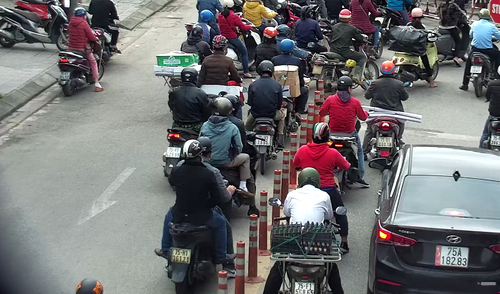

In [27]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

In [28]:
# !python lp_image.py -i test_image/3.jpg